# Pymaceuticals Inc.
---

### Analysis

  1. Pymaceuticals Inc selected 10 unique Drug Regimen mice for the skin cancer treatment. 
     Barchart shows Drug Regimen vs Number of mice: 
     The total number of regimens capomulin is more than the other kinds of regimens. 
     Capomulin- Drug Regimen :total number - 230, Female - 128,  Male   - 102. 
     Also Tumor volume and standard error mean in capomulin regimen is comparatively less than the the other regimen. 
     This data shows the study focused towards the Capomulin.
     Pie chart shows number of Male mice is more than the Female mice.
     
     
     
  2. Boxplot shows the Quartiles and Outliers of the specific regimens (Capomulin, Ramicane, Infubinol, Ceftamin).
     The study focused towards this regimens, the reason is Capomulin and Ramicane, both average tumer volume and count are          approximately 40 and count 230. Also Infubinol and Ceftamin, both both average tumer volume and count are                        approximately same 52 and 178 respectively. It gives efficient analysis report.
     Capomulin, ramicane and Ceftamin data shows left skewed (negatively) distribution that means mass volume come in the            largest values. Also average tumor volume of capomulin regimen is more range between 38 and 42.
     Infubinal data shows the normal distribution that means mean , median ,mode approximately at the center.
     
     
     
  3. Another study of specific capomulin mouse ID 1509(male) shows when timepoint days increases Tumor volume decrease.              That means treatment effect in the better way. 
  
  
  
  4. Correlation between mouse weight and aveage tuomor volume is 0.84. That menas both variable is linearly strong relation.
     weight of the mouse increses average tumore volume increses. Both variables are Positively correlated.This data to describe 
     how the tumor volume related to the weight of the mouse.
                              
                        
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Read the study results data
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
# merged data from study_results to mouse data depend on the 'mouse ID'
combined_data = pd.merge(mouse_metadata, study_results,  on='Mouse ID', how='outer')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# unique ID of mouse
unique_data = combined_data['Mouse ID'].unique()


In [9]:
# Checking the number of mice.
unique_data = len(combined_data['Mouse ID'].unique())
unique_data

249

In [10]:
duplicate_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_data.loc[combined_data['Mouse ID']=='g989', :]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# clean the data and store in new data frame
clean_data = combined_data.drop(duplicated_data.index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summry_data = pd.DataFrame({
                             'Mean Tumor Volume': mean,
                             'Median Tumor Volume':median,
                             'Tumor Volume Variance': var,
                             'Tumor Volume Std. Dev.': std,
                              'Tumor Volume Std. Err.': sem })
    
    
summry_data    
    


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_data = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
aggregation_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# count each mouse category to plot the Barchart.

total_mice = clean_data['Drug Regimen'].value_counts()
total_mice



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

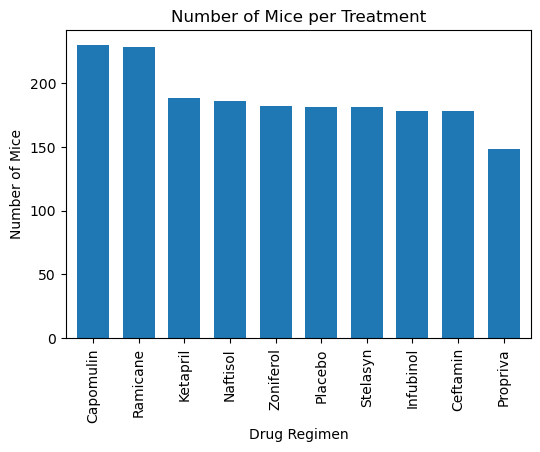

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = total_mice.plot(kind='bar', width=0.7, figsize=(6,4), 
                           align='center', xlabel='Drug Regimen', 
                           ylabel='Number of Mice', title='Number of Mice per Treatment')

plt.show()


In [18]:
total_mice.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [19]:
total_mice.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [20]:
mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
mice_names = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']


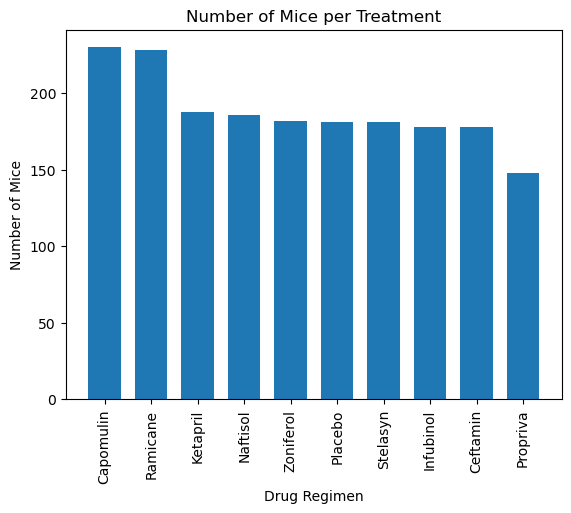

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
x_axis = np.arange(len(mice_count))

# Create a bar chart based upon the above data
plt.bar(x_axis, mice_count, align = 'center',width=0.7)

# Create the ticks for our bar chart's x axis
ticklocations = [value for value in x_axis]
plt.xticks(ticklocations,['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'])

plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = clean_data['Sex'].value_counts()
female_male

Male      958
Female    922
Name: Sex, dtype: int64

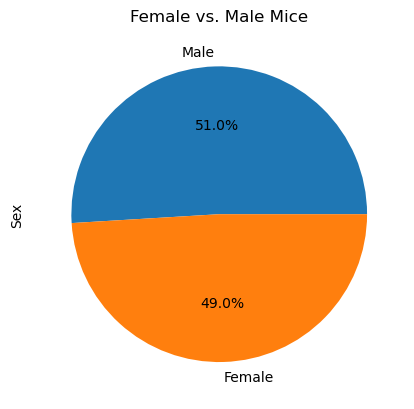

In [23]:
# create a pie plot for the number of female and male mice(comparison)
female_male.plot(kind='pie', autopct='%1.1f%%', title='Female vs. Male Mice')
plt.show()

In [24]:
female_male.count

<bound method Series.count of Male      958
Female    922
Name: Sex, dtype: int64>

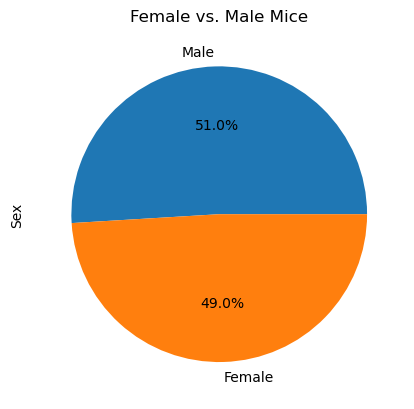

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
gender_count = [958, 922]

plt.pie(gender_count, labels=gender, autopct='%1.1f%%')

plt.ylabel('Sex')
plt.title('Female vs. Male Mice')

plt.show()




## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_point  = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_point = greatest_point.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_point,clean_data, on=['Mouse ID','Timepoint'], how ='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merged_data.loc[merged_data['Drug Regimen']== x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([0.25, 0.50,0.75])
    lower_qrt = quartiles[0.25]
    upper_qrt = quartiles[0.75]
    iqr = upper_qrt - lower_qrt

    lower_bount = lower_qrt-(1.5*iqr)
    upper_bount = upper_qrt+(1.5*iqr)

    outliers = final_volume.loc[(final_volume < lower_bount) | (final_volume > upper_bount)]

    print(f"{x}'s potential outliers: {outliers}")

   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


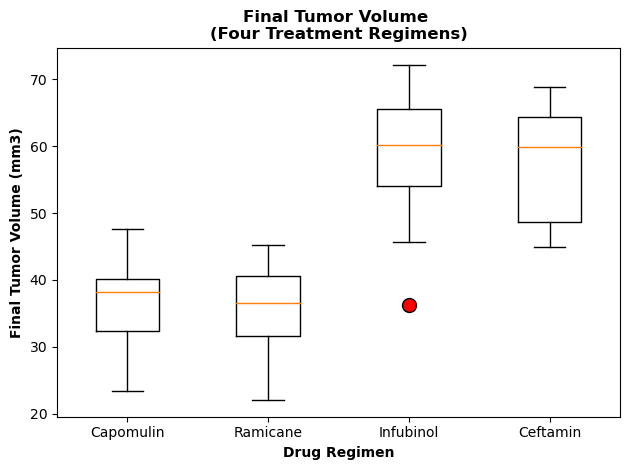

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, final_volume = plt.subplots()
final_volume.boxplot(tumor_volume_data, labels=treatment_list, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title

final_volume.set_xlabel('Drug Regimen', fontweight='bold')
final_volume.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')
final_volume.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
# Save box plot graph to Images folder
plt.tight_layout()
final_volume.figure.savefig('Images/final_tumor_volume_boxplot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


## Line and Scatter Plots

In [29]:
# select only the data about capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [30]:
capomulin_data['Sex'].value_counts()

Female    128
Male      102
Name: Sex, dtype: int64

In [31]:
# from the capomulin data , only select mouse id 1509,

mouse_1509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
mouse_1509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

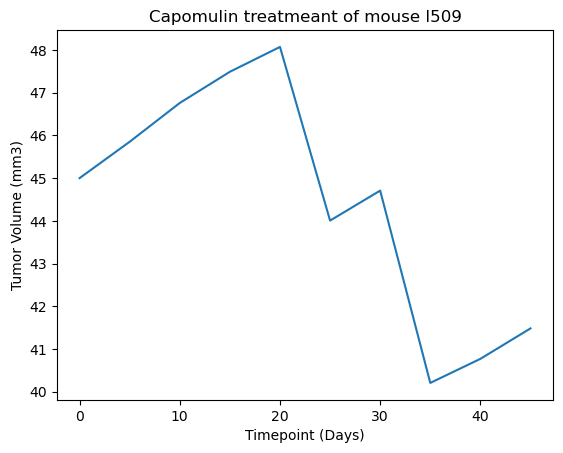

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = mouse_1509["Timepoint"]
yaxis = mouse_1509["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, yaxis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [38]:
# average tumor volume of all capomulin mice 
avg_tumor_vol = capomulin_data.groupby(['Mouse ID']).mean()
avg_tumor_vol.head()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


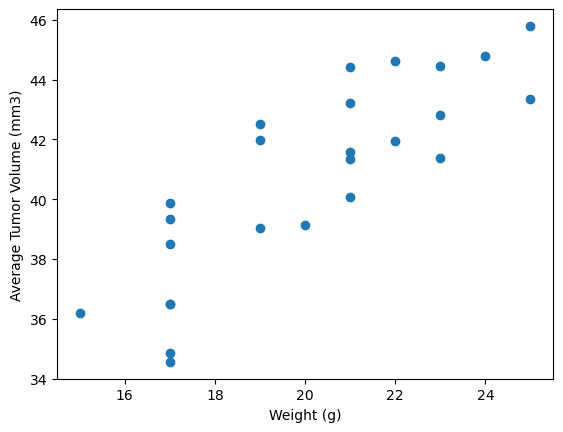

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
print(correlation)

print(f' The correlation between both is {round(correlation[0], 2)}')



PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712586e-07)
 The correlation between both is 0.84


The r-squared is: 0.709


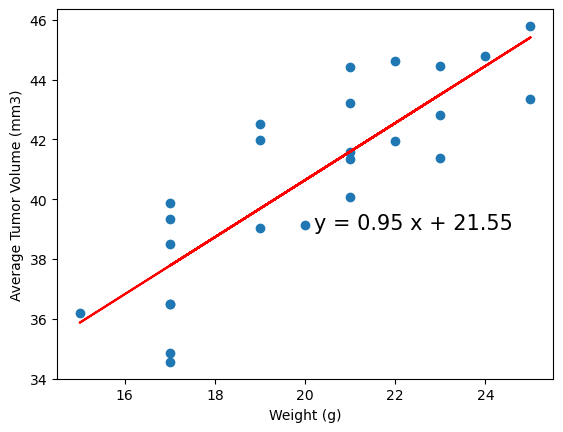

In [39]:
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
regress_values = avg_tumor_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(avg_tumor_vol["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq,(20.2, 39), fontsize=15)
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()